# **`STABLE DIFFUSION PROMPT`**

In [ ]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install compel

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DEISMultistepScheduler
from compel import Compel

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Providing detailed and good prompts for stable diffusion is quite import to obtain the desired image. In this notebook, you will be finding prompt techniques and experiments. We will use Dream Shaper model. Let's begin 🙂

**1- SUBJECT**

The subject is a crucial component of the prompt where you say what do you want to see as output.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/25 [00:00<?, ?it/s]

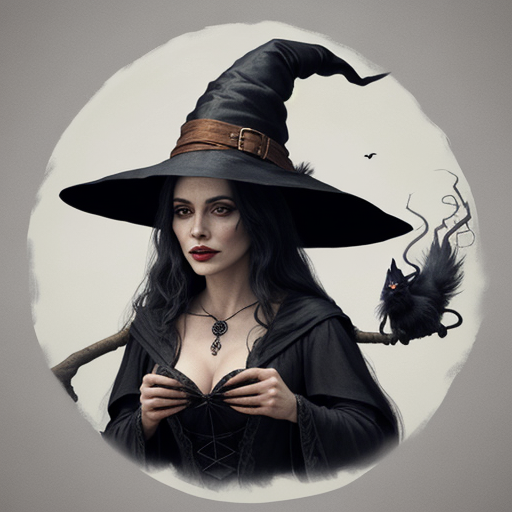

In [ ]:
pipeline = StableDiffusionPipeline.from_pretrained("Lykon/dreamshaper-8", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipeline.scheduler = DEISMultistepScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator(device="cuda").manual_seed(33)

prompt = "A witch"

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

  0%|          | 0/25 [00:00<?, ?it/s]

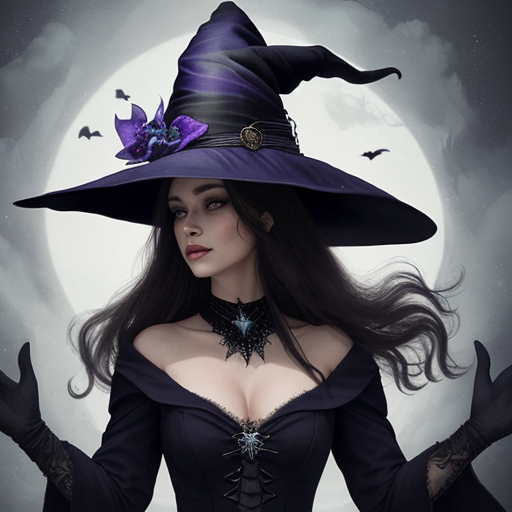

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(33)

prompt = "A beautiful and powerful witch"

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

**2- STYLE**

We can add different style to the image. Let's take a look to the styles 🎉

  0%|          | 0/25 [00:00<?, ?it/s]

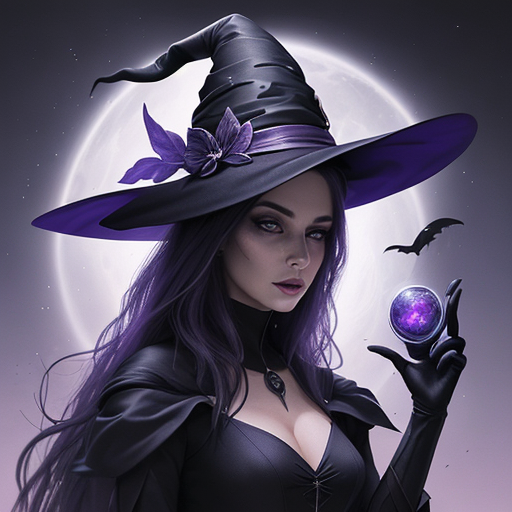

In [ ]:
# ["realistic", "hyperrealistic" , "dark art", "photorealistic", "cinematic", "surreal", "cyberpunk", "pixel art style", "pixar", "fantasy", "digital art", "anime style", "artstation", "futuristic"]

generator = torch.Generator(device="cuda").manual_seed(286773456)

# You can select a style from above list and try.
STYLE = "futuristic"
prompt = "A beautiful and powerful witch, " + STYLE

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

  0%|          | 0/25 [00:00<?, ?it/s]

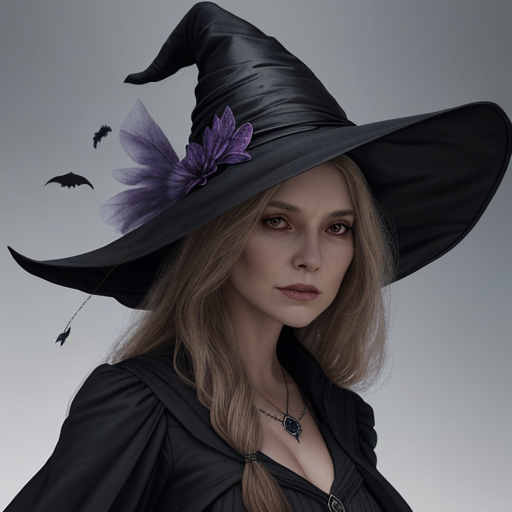

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(286773456)

STYLE = "realistic"
prompt = "A beautiful and powerful witch, " + STYLE

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

**3- RESOLUTION**

You can use some resolution keywords to get more sharp and detailed images ⬇

  0%|          | 0/25 [00:00<?, ?it/s]

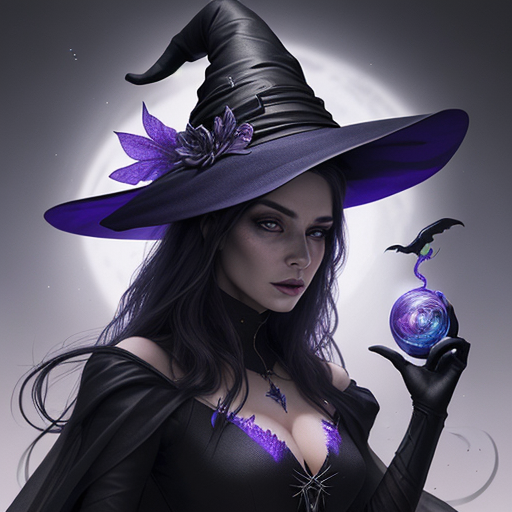

In [ ]:
# ["highly detailed", "sharp focus", "4k", "8k"]

generator = torch.Generator(device="cuda").manual_seed(286773456)

STYLE = "futuristic"
RESOLUTION = "highly detailed, "
prompt = "A beautiful and powerful witch, " + RESOLUTION + STYLE

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

**4- LIGHTING**

Lighting is an effective way to transform your image. You can try lighting types with the below code ⚡

  0%|          | 0/25 [00:00<?, ?it/s]

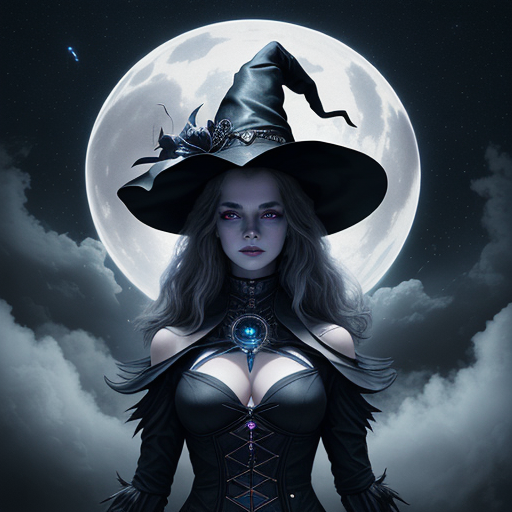

In [ ]:
# ["studio lighting", "bright light", "soft lighting", "neon light", "cinematic lighting", "surrounded by clouds at night", "dramatic lightening"]

generator = torch.Generator(device="cuda").manual_seed(286773456)

STYLE = "futuristic"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "
prompt = "A beautiful and powerful witch, " + RESOLUTION + LIGHTING + STYLE

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

**5- ADDITIONAL DETAILS AND WORDS**

We can add some spesific details such as how she wears it or what the background should be like :)

  0%|          | 0/25 [00:00<?, ?it/s]

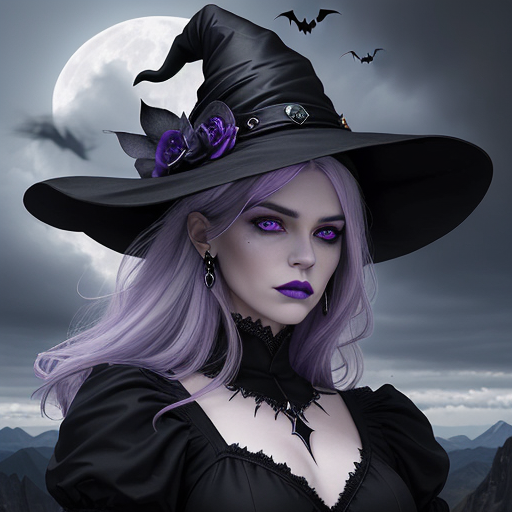

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(286773456)

STYLE = "futuristic, fantasy"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "
prompt = "Portrait of a beautiful and powerful witch, wearing a black dress with gemstones, serious eyes, small face, white with highlighted purple hair, witch hat, bats, mountain background" + RESOLUTION + LIGHTING + STYLE

image = pipeline(prompt=prompt, generator=generator, num_inference_steps=25).images[0]

image

**6- ADDING NEGATIVE PROMPT**

You can add a negative prompt to improve the image. Also, if there's something you wish to remove, you can add a keyword related to that in negative prompt.

  0%|          | 0/25 [00:00<?, ?it/s]

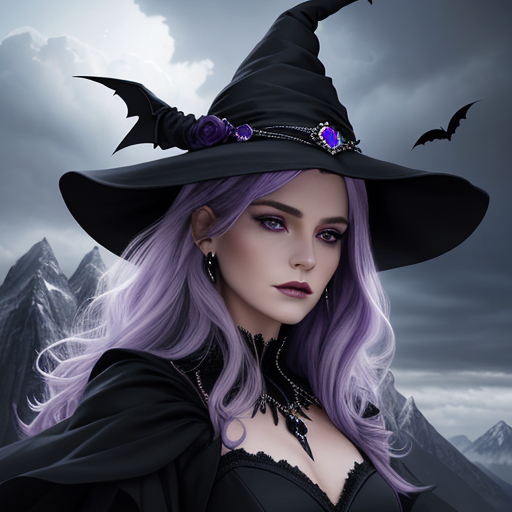

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(286773456)

STYLE = "futuristic, fantasy"
RESOLUTION = "highly detailed, "
LIGHTING = "surrounded by clouds at night, "
prompt = "Portrait of a beautiful and powerful witch, wearing a black dress with gemstones, serious eyes, small face, white with highlighted purple hair, windy, witch hat, bats, mountain background" + RESOLUTION + LIGHTING + STYLE

negative_prompt = "ugly, distorted, deformed, mutation, out of frame"

image = pipeline(prompt=prompt, negative_prompt=negative_prompt, generator=generator, num_inference_steps=25).images[0]

image